## Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [2]:
data = []
labels = []
classes = 10
cur_path = os.getcwd()

In [3]:
cur_path

'D:\\DATA SCIENCE\\DataSets\\Research\\Pixxort\\Body Part detection'

## Preprocess the images

In [4]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a).convert("RGB")
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [5]:
#data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [6]:
os.mkdir('retraining')

np.save('./retraining/data',data)
np.save('./retraining/target',labels)

## Load data & Labels

In [7]:
data=np.load('./retraining/data.npy')
labels=np.load('./retraining/target.npy')

In [8]:
print(data.shape, labels.shape)

(7699, 30, 30, 3) (7699,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=20)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6159, 30, 30, 3) (1540, 30, 30, 3) (6159,) (1540,)


## Convert labels to onehot encoding

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Now it's time to build the model

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
epochs = 80
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/80
193/193 [==============================] - 28s 136ms/step - loss: 5.7742 - accuracy: 0.1162 - val_loss: 2.1983 - val_accuracy: 0.2435
Epoch 2/80
193/193 [==============================] - 24s 127ms/step - loss: 2.1757 - accuracy: 0.2247 - val_loss: 2.0601 - val_accuracy: 0.2896
Epoch 3/80
193/193 [==============================] - 24s 125ms/step - loss: 2.0469 - accuracy: 0.2734 - val_loss: 1.9437 - val_accuracy: 0.3162
Epoch 4/80
193/193 [==============================] - 25s 127ms/step - loss: 1.9267 - accuracy: 0.3082 - val_loss: 1.8143 - val_accuracy: 0.3688
Epoch 5/80
193/193 [==============================] - 24s 127ms/step - loss: 1.7985 - accuracy: 0.3652 - val_loss: 1.6318 - val_accuracy: 0.4487
Epoch 6/80
193/193 [==============================] - 25s 128ms/step - loss: 1.6870 - accuracy: 0.4180 - val_loss: 1.5806 - val_accuracy: 0.4578
Epoch 7/80
193/193 [==============================] - 25s 127ms/step - loss: 1.6284 - accuracy: 0.4350 - val_loss: 1.4633 - val_ac

193/193 [==============================] - 25s 127ms/step - loss: 0.4557 - accuracy: 0.8525 - val_loss: 0.6193 - val_accuracy: 0.8149
Epoch 58/80
193/193 [==============================] - 24s 125ms/step - loss: 0.4518 - accuracy: 0.8503 - val_loss: 0.6107 - val_accuracy: 0.8416
Epoch 59/80
193/193 [==============================] - 24s 127ms/step - loss: 0.5169 - accuracy: 0.8317 - val_loss: 0.6286 - val_accuracy: 0.8175
Epoch 60/80
193/193 [==============================] - 24s 125ms/step - loss: 0.4608 - accuracy: 0.8417 - val_loss: 0.6442 - val_accuracy: 0.8253
Epoch 61/80
193/193 [==============================] - 24s 124ms/step - loss: 0.4821 - accuracy: 0.8452 - val_loss: 0.6450 - val_accuracy: 0.8104
Epoch 62/80
193/193 [==============================] - 24s 126ms/step - loss: 0.4696 - accuracy: 0.8428 - val_loss: 0.6260 - val_accuracy: 0.8266
Epoch 63/80
193/193 [==============================] - 24s 126ms/step - loss: 0.4183 - accuracy: 0.8632 - val_loss: 0.6890 - val_accurac

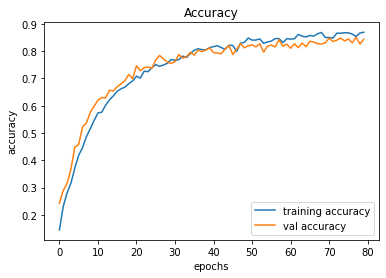

In [15]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

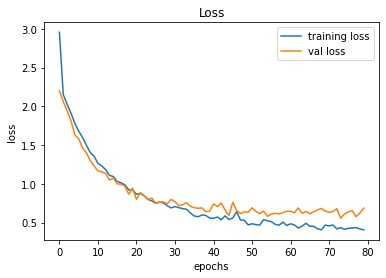

In [16]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Save the model

In [26]:
model.save("./TSR.h5")